**Online Learning: Backpropagation applied to Perceptron Neural Network**



In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Creating initial Data:

In [9]:
T = np.array([-0.960, -0.577, -0.073, 0.377, 0.641, 0.660, 0.461, 0.134, -0.201, -0.434, -0.500, -0.393, -0.165, 0.099, 0.307, 0.396, 0.345, 0.182, -0.031, -0.219, -0.320])
X = np.linspace(-1,1,21)
X_bias = np.ones(21)
#   Creating a relational data set

X = np.concatenate([X_bias, X])
X = X.reshape(2,21).T
dataset = pd.DataFrame(X , columns={"Bias","X"})
dataset["T"] = T

In [10]:
dataset

,X,Bias,T
0,1.0,-1.0,-0.960
1,1.0,-0.9,-0.577
2,1.0,-0.8,-0.073
3,1.0,-0.7,0.377
4,1.0,-0.6,0.641
5,1.0,-0.5,0.660
6,1.0,-0.4,0.461
7,1.0,-0.3,0.134
8,1.0,-0.2,-0.201
9,1.0,-0.1,-0.434


Plotting input Data:

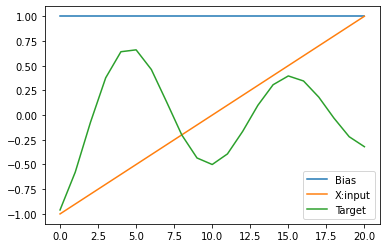

In [11]:
plt.plot(dataset, label='Inline Label')
plt.legend(["Bias","X:input","Target"])

**Create parameters of the Perceptron neural network**

In [12]:
no_inputs = 1
no_hidden_neurons = 5
no_outputs = 1
no_samples = 21
# Weights for layer 1
V1 = np.random.rand(5,2)
print(V1.shape)
# Weights for layer 2
W2 = np.random.rand(6,1)
##Bias2 = np.array([-1.0295])
print(W2.shape, W2)
print(X.shape,X, V1)

(5, 2)
(6, 1) [[0.47469232]
 [0.22777704]
 [0.64854428]
 [0.3694941 ]
 [0.98133113]
 [0.20903941]]
(21, 2) [[ 1.  -1. ]
 [ 1.  -0.9]
 [ 1.  -0.8]
 [ 1.  -0.7]
 [ 1.  -0.6]
 [ 1.  -0.5]
 [ 1.  -0.4]
 [ 1.  -0.3]
 [ 1.  -0.2]
 [ 1.  -0.1]
 [ 1.   0. ]
 [ 1.   0.1]
 [ 1.   0.2]
 [ 1.   0.3]
 [ 1.   0.4]
 [ 1.   0.5]
 [ 1.   0.6]
 [ 1.   0.7]
 [ 1.   0.8]
 [ 1.   0.9]
 [ 1.   1. ]] [[0.24144195 0.64570444]
 [0.8895177  0.51309822]
 [0.83669252 0.31052303]
 [0.75164054 0.33475607]
 [0.88050001 0.08657968]]


**1. Forward Pass**

In [13]:
# Model of the Neural Network (to be discussed in the tutorial)
def forward_prop(X, V1, W2):
    # FIRST LAYER 
    u_li = X.dot(V1.T)
    M = (np.exp(u_li) - np.exp(-u_li))/(np.exp(u_li) + np.exp(-u_li)) # Tangent Hyperbolic function
    # SECOND LAYER
    bias_2 = np.ones(no_outputs) # getting number of columns
    # Concatenate vectors bias_2 and M1
    zl = np.concatenate((bias_2, M), axis=0)
    Y = zl.dot(W2)
    return Y, zl

2. Backpropagation Pass

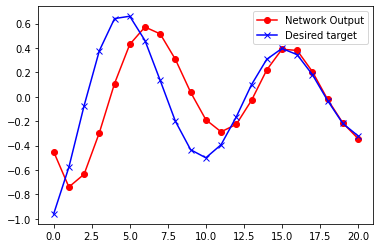

[[-2.33656797  3.41743565]
 [ 3.86170263  1.89280647]
 [ 2.0732548  -0.738067  ]
 [ 1.95238463 -0.71192175]
 [ 1.39368349 -3.14038094]] (6,) [ 1.          0.79421867  0.99997992  0.87062941  0.84567563 -0.94093658]
[[-0.71481366]
 [-1.14699696]
 [ 0.89837011]
 [-0.45125274]
 [-0.24347734]
 [-1.05749633]] [[-0.45039994]
 [-0.73949067]
 [-0.63470815]
 [-0.29521219]
 [ 0.10878116]
 [ 0.42932128]
 [ 0.57186873]
 [ 0.51531432]
 [ 0.30627857]
 [ 0.03700411]
 [-0.18795564]
 [-0.28712199]
 [-0.22608495]
 [-0.02934835]
 [ 0.21950365]
 [ 0.38954772]
 [ 0.37988729]
 [ 0.20645134]
 [-0.02162644]
 [-0.21460527]
 [-0.3422877 ]] [[ 1.  -1. ]
 [ 1.  -0.9]
 [ 1.  -0.8]
 [ 1.  -0.7]
 [ 1.  -0.6]
 [ 1.  -0.5]
 [ 1.  -0.4]
 [ 1.  -0.3]
 [ 1.  -0.2]
 [ 1.  -0.1]
 [ 1.   0. ]
 [ 1.   0.1]
 [ 1.   0.2]
 [ 1.   0.3]
 [ 1.   0.4]
 [ 1.   0.5]
 [ 1.   0.6]
 [ 1.   0.7]
 [ 1.   0.8]
 [ 1.   0.9]
 [ 1.   1. ]]


In [14]:
learning_rate = 0.1
error = np.zeros([21,1])
Yi = np.zeros([21,1]) # network output
for epoch in range(700):
  for sample in range(0,21):
    #               --- FeedForward PASS ---
    Yi[sample] , zl = forward_prop(X[sample,:], V1, W2)
#     #       --- Calculation of Individual Error ---
    error[sample] = T[sample] - Yi[sample]
    for l in range(0,no_hidden_neurons+1):
#       # is plus 1 because we consider the bias
      delta_i2 = -error[sample]*zl[l]
      W2[l] = W2[l] - learning_rate*delta_i2
    for l in range(0,no_hidden_neurons):
      delta_l1 = -error[sample] * W2[l+1] * (1 - zl[l+1]*zl[l+1] )      
      for j in range(0,no_inputs+1):
        V1[l][j] = V1[l][j] - learning_rate*delta_l1*X[sample][j]  

plt.plot(Yi, 'red', marker="o", label='Inline Label')  
plt.plot(T, 'b', marker="x", label='Inline Label') 
plt.legend(["Network Output","Desired target"])
plt.show()
print(V1, zl.shape, zl)
print(W2, Yi,X)